In [6]:
import numpy as np  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os

In [10]:
os.listdir("../data/01_raw")


['.gitignore', 'employee.csv.dvc']

In [23]:
emp=pd.read_csv("../data/01_raw/employee.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../data/01_raw/employee.csv'

In [18]:
emp.head()

,outs:
0,- md5: e6b0a823ad492411cc61c2e5f0fcc77c
1,size: 195247
2,path: employee.csv


In [19]:
emp.describe()

,outs:
count,3
unique,3
top,- md5: e6b0a823ad492411cc61c2e5f0fcc77c
freq,1


In [20]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   outs:   3 non-null      object
dtypes: object(1)
memory usage: 152.0+ bytes


Education analysis

In [21]:
edu = emp.Education.value_counts()
edu.index

AttributeError: 'DataFrame' object has no attribute 'Education'

NameError: name 'edu' is not defined

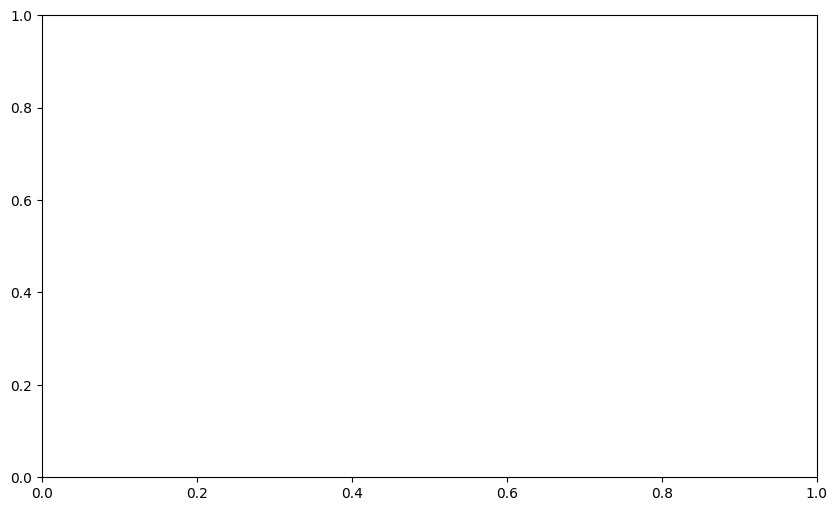

In [22]:
plt.figure(figsize=(10,6))
ax = plt.subplot()
colors=["#6495ED","#9FE2BF","#CCCCFF"]
ax.pie(edu.values,labels = edu.index,shadow = True , autopct ='%.0f%%',colors=colors,radius=2)
plt.title("Education")
plt.legend(edu.index)
plt.show()

See education of leaving employees

In [ ]:
left=emp[emp["LeaveOrNot"]==1]

In [ ]:
left_edu=left.Education.value_counts()
plt.figure(figsize=(10,6))
ax = plt.subplot()
colors=["#6495ED","#9FE2BF","#CCCCFF"]
ax.pie(left_edu.values,labels = left_edu.index,shadow = True , autopct ='%.0f%%',colors=colors,radius=2)
plt.title("Education")
plt.legend(left_edu.index)
plt.show()

What gender are the leaving employees ?

In [ ]:
fcount=sum(emp["Gender"]=="Female")
mcount=sum(emp["Gender"]=="Male")
fpercent=fcount/emp.Gender.value_counts()
mpercent=mcount/emp.Gender.value_counts()

In [ ]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Gender", data=emp)

for bar in ax.patches:
   
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

In [ ]:
tot=emp.Gender.value_counts()
fcount=tot.Female
mcount=tot.Male
fpercent=fcount/emp.Gender.count()
mpercent=mcount/emp.Gender.count()
fpercent,mpercent

In [ ]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Gender", data=left)

for bar in ax.patches:
   
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

As we see, women leave the company more often

Researching how gender affects the data.

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(emp['Age'],color='blue',bins=15)
plt.tight_layout()
plt.grid(True)
plt.show()

Company mainly hires young people

In [ ]:
plt.figure(figsize=(15,5))
sns.kdeplot(data=emp, x="JoiningYear",hue="Gender",palette='husl',hue_order=["Female","Male"],)

In 2016 and 2018 company didn't hire a lot of women

Exploring correlation

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(emp.corr(),annot= True,cmap = 'crest')
plt.show()

Payment Tier , Joining year are the most affecting features on whether the employee leave or not .



Payment tiers.

In [ ]:
sns.countplot(data = emp, x= emp['PaymentTier'],hue = emp["Gender"],palette="mako")

There is a huge bias in payment Tier level 3 between male and females,and some bias in level 2.¶


In [ ]:
sns.countplot(data = left, x= left['PaymentTier'],hue = left["JoiningYear"],palette="rocket")

Most of employees who left the company are the recent joiners.at 2018 and most of them have payment tier 3.¶


In [ ]:
sns.countplot(data = left, x= left['PaymentTier'],hue = left["ExperienceInCurrentDomain"],palette="tab10")

This shows that most of employees who left the company have payment Tier of level 3 and most of the have 2 years of experience.
this may convey that the company recently has tried to attract employees with high payment tiers.

Exploring offices location

In [ ]:

sns.histplot(data=emp, x="City", hue="Gender", multiple="dodge",palette="mako" ,shrink=.8)

Bias in hiring females occures at Banglore office

In [ ]:
sns.histplot(data=left, x="City", multiple="dodge",color="blue" ,shrink=.8)

Most of employees who left the company are loacated at Pune office.

1. Most of employees who left the company are Master's holders.
2. Most of employees who left the company have Payment Tier 3 and 2 years of experience.
3. There is bias in hiring females occures at Banglore office.
4. Most of employees who left the company are Located at Pune Office.
5. There is a huge bias in payment Tier level 3 between male and females,and some bias in level 2.